In [1]:
import numpy as np
from scipy.linalg import solve_discrete_are
import cvxpy as cp
from algorithms import policy_fitting, policy_fitting_with_a_kalman_constraint
import warnings
# warnings.filterwarnings('ignore')

In [2]:
np.random.seed(0)
n, m = 4, 2
A = np.random.randn(n, n)
A = A / np.abs(np.linalg.eig(A)[0]).max()
B = np.random.randn(n, m)
W = .25 * np.eye(n)
Q_true = np.eye(n)
R_true = np.eye(m)
P_true = solve_discrete_are(A, B, Q_true, R_true)
K_true = -np.linalg.solve(R_true + B.T @ P_true @ B, B.T @ P_true @ A)

In [3]:
def simulate(K, N=10, seed=None, add_noise=False):
    if seed is not None:
        np.random.seed(seed)
    x = np.random.multivariate_normal(np.zeros(n), W)
    xs = []
    us = []
    cost = 0.0
    for _ in range(N):
        u = K @ x
        if add_noise:
            u += 2*np.random.randn(m)
        xs.append(x)
        us.append(u)
        cost += (x @ Q_true @ x + u @ R_true @ u) / N
        x = A @ x + B @ u + np.random.multivariate_normal(np.zeros(n), W)
    xs = np.array(xs)
    us = np.array(us)
    
    return cost, xs, us

In [4]:
N_test = 10000
cost_true = simulate(K_true, N=N_test, seed=0)[0]
cost_noise = simulate(K_true, N=N_test, seed=0, add_noise=True)[0] 
cost_true, np.trace(P_true @ W), cost_noise

(1.7934243186095473, 1.8031177219720198, 64.75750340186758)

In [5]:
costs_lr = []
costs_admm = []
Ns = np.arange(1, 51)
for N in Ns:
    costs_lr += [[]]
    costs_admm += [[]]
    for k in range(1, 11):
        _, xs, us = simulate(K_true, N=N, seed=k, add_noise=True)

        def L(K):
            return cp.sum_squares(xs @ K.T - us)

        def r(K):
            return .01 * cp.sum_squares(K), []
        
        Klr = policy_fitting(L, r, xs, us)
        Kadmm = policy_fitting_with_a_kalman_constraint(L, r, xs, us, A, B, n_random=5)
        
        cost_lr = simulate(Klr, N=N_test, seed=0)[0]
        cost_admm = simulate(Kadmm, N=N_test, seed=0)[0]
        
        if np.isnan(cost_lr) or cost_lr > 1e5 or cost_lr == np.inf:
            cost_lr = np.nan

        costs_lr[-1].append(cost_lr)
        costs_admm[-1].append(cost_admm)

    print (" %03d | %3.3f | %3.3f | %3.3f | %3.3f" %
           (N, cost_true, cost_noise, np.nanmean(costs_lr[-1]), np.nanmean(costs_admm[-1])))

/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in matmul
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in matmul
  if __name__ == '__main__':
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in matmul
  if __name__ == '__main__':
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in matmul
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in matmul
  if __name__ == '__main__':
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in matmul
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in matmul
  from ipykernel import 

 001 | 1.793 | 64.758 | 7.175 | 11.667


/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in matmul
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in matmul
  if __name__ == '__main__':
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in matmul
  if __name__ == '__main__':
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in matmul
  from ipykernel import kernelapp as app
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in matmul
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in matmul
  if __name__ 

 002 | 1.793 | 64.758 | nan | 19.395


/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in matmul
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in matmul
  if __name__ == '__main__':
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in matmul
  if __name__ == '__main__':
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in matmul
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in matmul
  if __name__ == '__main__':
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in matmul
  if __name__ == '__ma

 003 | 1.793 | 64.758 | nan | 8.462


/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in matmul
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in matmul
  if __name__ == '__main__':
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in matmul
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in matmul
  if __name__ == '__main__':
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in matmul
  from ipykernel import kernelapp as app
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in matmul
  


 004 | 1.793 | 64.758 | nan | 4.838


/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in matmul
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in matmul
  if __name__ == '__main__':
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in matmul
  if __name__ == '__main__':
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in matmul
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in matmul
  if __name__ == '__main__':
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in matmul
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in matmul
  if __name__ == '__main_

 005 | 1.793 | 64.758 | 167.778 | 5.168


/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in matmul
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in matmul
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in add
  from ipykernel import kernelapp as app
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in matmul
  if __name__ == '__main__':
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in matmul
  if __name__ == '__main__':
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in matmul
  
/home/sh

 006 | 1.793 | 64.758 | 25.953 | 3.834


/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in matmul
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in matmul
  if __name__ == '__main__':
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in matmul
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in matmul
  if __name__ == '__main__':
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in matmul
  from ipykernel import kernelapp as app


 007 | 1.793 | 64.758 | 47.339 | 4.464


/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in matmul
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in matmul
  from ipykernel import kernelapp as app
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in matmul
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in matmul
  from ipykernel import kernelapp as app


 008 | 1.793 | 64.758 | 21.648 | 3.869
 009 | 1.793 | 64.758 | 28.426 | 3.086


/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in matmul
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in matmul
  from ipykernel import kernelapp as app
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in matmul
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in matmul
  from ipykernel import kernelapp as app


 010 | 1.793 | 64.758 | 11.493 | 2.858
 011 | 1.793 | 64.758 | 9.387 | 2.940
 012 | 1.793 | 64.758 | 7.426 | 2.813


/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in matmul
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in add
  from ipykernel import kernelapp as app
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in matmul
  
/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in add
  from ipykernel import kernelapp as app


 013 | 1.793 | 64.758 | 6.513 | 2.633
 014 | 1.793 | 64.758 | 5.863 | 2.720
 015 | 1.793 | 64.758 | 7.577 | 3.500
 016 | 1.793 | 64.758 | 6.281 | 2.639
 017 | 1.793 | 64.758 | 5.540 | 2.652
 018 | 1.793 | 64.758 | 4.993 | 2.375
 019 | 1.793 | 64.758 | 4.666 | 2.328
 020 | 1.793 | 64.758 | 4.420 | 2.681
 021 | 1.793 | 64.758 | 4.154 | 2.250
 022 | 1.793 | 64.758 | 3.775 | 2.303
 023 | 1.793 | 64.758 | 3.055 | 2.167
 024 | 1.793 | 64.758 | 3.164 | 2.168
 025 | 1.793 | 64.758 | 3.192 | 2.186
 026 | 1.793 | 64.758 | 3.075 | 2.446
 027 | 1.793 | 64.758 | 2.942 | 2.062
 028 | 1.793 | 64.758 | 3.006 | 2.241
 029 | 1.793 | 64.758 | 2.888 | 2.098
 030 | 1.793 | 64.758 | 2.734 | 2.096
 031 | 1.793 | 64.758 | 2.783 | 2.053
 032 | 1.793 | 64.758 | 2.767 | 2.089
 033 | 1.793 | 64.758 | 2.635 | 2.067
 034 | 1.793 | 64.758 | 2.649 | 2.020
 035 | 1.793 | 64.758 | 2.702 | 2.003
 036 | 1.793 | 64.758 | 2.673 | 2.015
 037 | 1.793 | 64.758 | 2.608 | 1.992
 038 | 1.793 | 64.758 | 2.572 | 2.044
 039 | 1.793

In [6]:
costs_lr = np.array(costs_lr)
costs_admm = np.array(costs_admm)

In [7]:
mean_lr = np.nanmean(costs_lr, axis=1)
std_lr = np.nanstd(costs_lr, axis=1)

/home/shane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/home/shane/miniconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [8]:
mean_admm = np.nanmean(costs_admm, axis=1)
std_admm = np.nanstd(costs_admm, axis=1)

In [9]:
mean_lr

array([  7.17505726,          nan,          nan,          nan,
       167.7776202 ,  25.95336297,  47.33942466,  21.64819169,
        28.4264231 ,  11.49335085,   9.3870271 ,   7.42602702,
         6.51309744,   5.86299367,   7.57668828,   6.28123524,
         5.53958305,   4.99321005,   4.6658621 ,   4.42048585,
         4.15406587,   3.77507901,   3.05532633,   3.16409832,
         3.19201169,   3.07529883,   2.94164689,   3.00553332,
         2.88786207,   2.73386709,   2.78261564,   2.76702304,
         2.63489285,   2.64897739,   2.70231752,   2.67345537,
         2.60779712,   2.57217186,   2.5040243 ,   2.61853172,
         2.69390048,   2.59571008,   2.57412138,   2.59777505,
         2.60813411,   2.56399852,   2.52618843,   2.51519536,
         2.47833073,   2.44758883])

In [10]:
mean_admm

array([11.66676803, 19.39524724,  8.46183803,  4.83765044,  5.16760857,
        3.83373505,  4.46352311,  3.86851343,  3.08596165,  2.85792269,
        2.93967851,  2.81286477,  2.63295805,  2.72008462,  3.49981542,
        2.6394798 ,  2.65170237,  2.37480589,  2.32821912,  2.68124428,
        2.2504261 ,  2.30339158,  2.16677682,  2.16820091,  2.18559083,
        2.44649199,  2.06165553,  2.24091117,  2.09795955,  2.09560264,
        2.05345415,  2.08915682,  2.06704086,  2.02044128,  2.00293439,
        2.0151965 ,  1.9921432 ,  2.04404856,  2.01679465,  2.02920992,
        2.11482224,  2.08335556,  2.08067108,  2.06913906,  2.03290299,
        2.03358023,  2.02354654,  2.01904136,  1.99863932,  1.97493126])

In [11]:
# mean_admm = np.load("mean_admm.npy")
# mean_lr = np.load("mean_lr.npy")
# std_admm = np.load("std_admm.npy")
# std_lr = np.load("std_lr.npy")
# costs_lr = np.load("costs_lr.npy")
# costs_admm = np.load("costs_admm.npy")

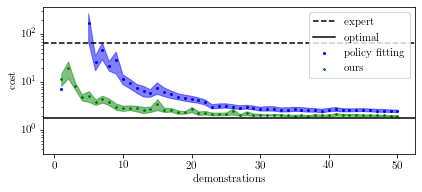

In [14]:
from utils import latexify
import matplotlib.pyplot as plt

plt.close()
latexify(fig_width=6, fig_height=2.8)
plt.axhline(cost_noise, ls='--', c='k', label='expert')
plt.scatter(np.arange(1,51), mean_lr, s=4, marker='o', c='blue', label='policy fitting')
plt.fill_between(np.arange(1,51), mean_lr - std_lr / 3, mean_lr + std_lr / 3, alpha=.5, color='blue')
plt.scatter(np.arange(1,51), mean_admm, s=4, marker='*', c='green', label='ours')
plt.fill_between(np.arange(1,51), mean_admm - std_admm / 3, mean_admm + std_admm / 3, alpha=.5, color='green')
plt.semilogy()
plt.axhline(cost_true, ls='-', c='k', label='optimal')
plt.ylabel('cost')
plt.xlabel('demonstrations')
plt.legend()
plt.tight_layout()
plt.savefig("figs/small_random.pdf")
plt.show()

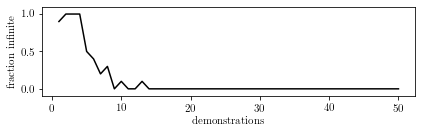

In [13]:
plt.close()
latexify(fig_width=6, fig_height=2)
plt.plot(np.arange(1, 51), np.isnan(costs_lr).mean(axis=1), c='k')
plt.ylim(-.1,1.1)
plt.xlabel("demonstrations")
plt.ylabel("fraction infinite")
plt.tight_layout()
plt.savefig("figs/inf_small_random.pdf")